In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns #count plot

import chart_studio.plotly as py #plotly library
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


import os
print(os.listdir("../input"))

['gender_submission.csv', 'test.csv', 'train.csv']


In [2]:
data_train = pd.read_csv('../input/train.csv')
data_test = pd.read_csv('../input/test.csv')

In [3]:
data_train.info()

print()

data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null floa

In [4]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
#Drop unneed columns and save

data_train.drop(["Name","Cabin","Ticket","Embarked"],axis = 1,inplace = True)

data_test.drop(["Name","Cabin","Ticket","Embarked"],axis = 1,inplace = True)

In [7]:
#Split dataframe into 'survived' and 'not survived' so we will use these easily at data visualization

data_survived = data_train[data_train['Survived'] == 1].sort_values('Age') #dataframe that only has datas from survived peoples 

data_not_survived = data_train[data_train['Survived'] == 0].sort_values('Age')

#We will use this serie at line plot

survived_age_number = data_survived.Age.value_counts(sort = False,dropna = True)#How many survived people are from which age

not_survived_age_number = data_not_survived.Age.value_counts(sort = False,dropna = True)

display(survived_age_number)

not_survived_age_number

0.75     2
1.00     5
2.00     3
3.00     5
4.00     7
        ..
80.00    1
0.42     1
0.67     1
0.83     2
0.92     1
Name: Age, Length: 65, dtype: int64

1.0     2
2.0     7
3.0     1
4.0     3
6.0     1
       ..
66.0    1
70.0    2
71.0    2
74.0    1
70.5    1
Name: Age, Length: 77, dtype: int64

In [8]:
#0.42,0.67 .. values at tail of serie and this is a wrong sort.Lets fix it.

a = survived_age_number.tail(4)#put values into a.

survived_age_number.drop([0.42,0.67,0.83,0.92],inplace = True)#delete these values from tail of serie

survived_age_number = pd.concat([a,survived_age_number],axis=0)#attach a to head of serie

survived_age_number #Done

0.42     1
0.67     1
0.83     2
0.92     1
0.75     2
        ..
58.00    3
60.00    2
62.00    2
63.00    2
80.00    1
Name: Age, Length: 65, dtype: int64

In [9]:
#trace1 is green line and trace2 is red line.

trace1 = go.Scatter(
    x = survived_age_number.index,
    y = survived_age_number,
    opacity = 0.75,
    name = "Survived",
    mode = "lines",
    marker=dict(color = 'rgba(0, 230, 0, 0.6)'))

trace2 = go.Scatter(
    x = not_survived_age_number.index,
    y = not_survived_age_number,
    opacity=0.75,
    name = "Not Survived",
    mode = "lines",
    marker=dict(color = 'rgba(230, 0, 0, 0.6)'))

data = [trace1,trace2]
layout = go.Layout(title = 'Age of Survived and not-Survived People in Titanic',
                   xaxis=dict(title='Age'),
                   yaxis=dict( title='Count'),)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

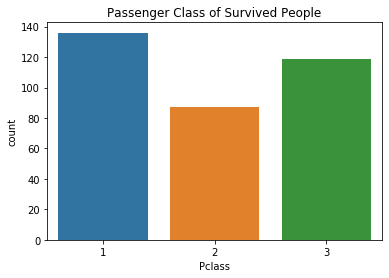

In [10]:
sns.countplot(data_survived.Pclass)
plt.title('Passenger Class of Survived People')
plt.show()

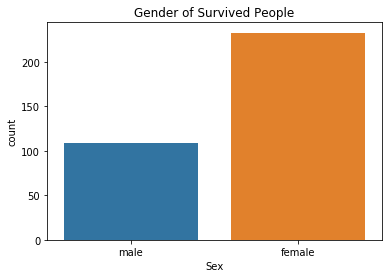

In [11]:
sns.countplot(data_survived.Sex)
plt.title('Gender of Survived People')
plt.show()

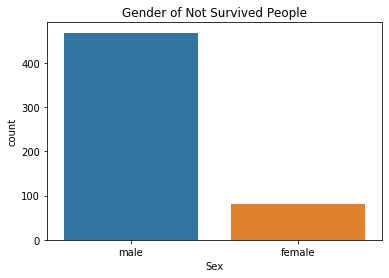

In [12]:
sns.countplot(data_not_survived.Sex)
plt.title('Gender of Not Survived People')
plt.show()

In [13]:
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [14]:
data_train_x = data_train #We should prepare x and y data for train classification

data_train_x.Sex = [1 if i == 'male' else 0 for i in data_train_x.Sex] #Transform strings to integers

data_train_y = data_train_x.Survived #y is our output  

data_train_x.drop(['PassengerId','Survived'], axis = 1,inplace = True)#drop passengerıd and survived because they will not use while training

data_train_x.fillna(0.0,inplace = True) #fill NaN values with zero.We write '0.0' because we want to fill with float values 

#normalization :  i encountered 'to make conform to or reduce to a norm or standard' definition when i search normalization on google.
#But if you ask simply definition i say that : 'to fit values between 0 and 1'
#Normalization formula : (data - min)/(max-min) 

data_train_x = (data_train_x - np.min(data_train_x))/(np.max(data_train_x) - np.min(data_train_x)).values

In [15]:
#We repeat same process to test dataset

data_test.Sex = [1 if i == 'male' else 0 for i in data_test.Sex]

PassengerId = data_test['PassengerId'].values

data_test.drop(['PassengerId'], axis = 1,inplace = True)

data_test.fillna(0.0,inplace = True)

data_test = (data_test - np.min(data_test))/(np.max(data_test) - np.min(data_test)).values

In [16]:
#Split train data in order to reserve %80 of train data for test .You don't confuse this test data is for check.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_train_x,data_train_y,test_size = 0.2,random_state=1)

score_list = [] #to keep scores of algorithms

In [17]:
from sklearn.linear_model import LogisticRegression #importing logistic regression model

lr = LogisticRegression()

lr.fit(x_train,y_train)#fit or train data

print('Logistic Regression Score : ',lr.score(x_test,y_test))#Ratio of correct predictions

score_list.append(lr.score(x_test,y_test))

Logistic Regression Score :  0.7877094972067039


In [18]:
#this is our real prediction part

lr.fit(data_train_x,data_train_y)

lr_prediction = lr.predict(data_test)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(x_train,y_train)

print('K-Nearest Neighbors Score : ',knn.score(x_test,y_test))

score_list.append(knn.score(x_test,y_test))

K-Nearest Neighbors Score :  0.7932960893854749


In [20]:
knn.fit(data_train_x,data_train_y)

knn_prediction = knn.predict(data_test)

In [21]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)

svm.fit(x_train,y_train)

print('Support Vector Machine Score : ',svm.score(x_test,y_test))

score_list.append(svm.score(x_test,y_test))

Support Vector Machine Score :  0.7821229050279329


In [24]:
svm.fit(data_train_x,data_train_y)

svm_prediction = svm.predict(data_test)

In [25]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(x_train,y_train)

print('Naive Bayes Score : ',nb.score(x_test,y_test))

score_list.append(nb.score(x_test,y_test))

Naive Bayes Score :  0.7541899441340782


In [26]:
nb.fit(data_train_x,data_train_y)

nb_prediction = nb.predict(data_test)

In [27]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)

print('Decision Tree Score : ',dt.score(x_test,y_test))

score_list.append(dt.score(x_test,y_test))

Decision Tree Score :  0.7486033519553073


In [28]:
dt.fit(data_train_x,data_train_y)

dt_prediction = dt.predict(data_test)

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 22,random_state = 40)

rf.fit(x_train,y_train)

print('Random Forest Score : ',rf.score(x_test,y_test))

score_list.append(rf.score(x_test,y_test))

Random Forest Score :  0.7821229050279329


In [30]:
rf.fit(data_train_x,data_train_y)

rf_prediction = rf.predict(data_test)

In [31]:
pr_dict = {'Logistic Regression' : lr_prediction,'KNN' : knn_prediction,'SVM' : svm_prediction,
           'Naive Bayes' : nb_prediction,'Decision Tree' : dt_prediction, 'Random Forest' : rf_prediction}

all_predictions = pd.DataFrame(pr_dict)

all_predictions

,Logistic Regression,KNN,SVM,Naive Bayes,Decision Tree,Random Forest
0,0,0,0,0,0,0
1,0,0,1,1,0,0
2,0,0,0,0,0,0
3,0,0,0,0,1,0
4,1,0,1,1,0,0
...,...,...,...,...,...,...
413,0,0,0,0,0,0
414,1,1,1,1,1,1
415,0,0,0,0,0,0
416,0,0,0,0,0,0


In [32]:
final_prediction = [] #final prediction list

#i : range columns , j : range rows

for i in all_predictions.values:
    sum_zero_score = 0 #summary of zero scores
    
    sum_one_score = 0 #summary of one scores
    
    for j in range(5):
        if i[j]==0:
            sum_zero_score += score_list[j]
        else:
            sum_one_score += score_list[j]
    
    if sum_zero_score >= sum_one_score:
        final_prediction.append(0)
    else:
        final_prediction.append(1)

In [33]:
output = {'PassengerId' : PassengerId,'Survived' : final_prediction}

submission = pd.DataFrame(output)

submission.to_csv('output.csv', index = False)